Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 1)                 0         
_________________________________________________________________
hidden_dense_layer (Dense)   (None, 512)               1024      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
output_dense_layer (Dense)   (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
8/8 [==============================] - 0s 53ms/step - loss: 0.2349 - accuracy: 0.3056 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: 0.1740 - accuracy: 0.3333 - val_loss

2827

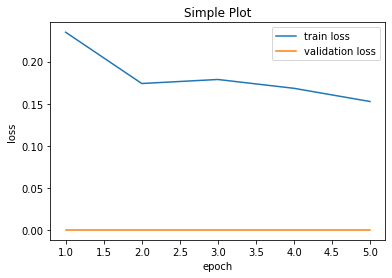

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import gc

N_HIDDEN = 512
RESHAPED = 1
NB_CLASSES = 1
BATCH_SIZE = 5
EPOCHS = 5
VERBOSE = 1
VALIDATION_SPLIT = 0.25
DROPOUT = 0.3

tf.keras.backend.set_floatx('float64')
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))

total_independent = [4.,5.,6.,2.,3.,0.,0.,5.,3.,2.,7.,3.,0.,5.,2.,7.,0.,3.,9.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
total_dependent = [1,1,1,0,0,1,0,1,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
x_test = [5.,6.,1.,8.,3.,2.,9.,0.]
y_test = [1,1,0,1,0,0,1,0]

def displayResults(history):
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs = range(1, len(validation_loss)+1)

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(epochs, train_loss, label='train loss')
    ax.plot(epochs, validation_loss, label='validation loss')
    ax.set_xlabel('epoch')  # Add an x-label to the axes.
    ax.set_ylabel('loss')  # Add a y-label to the axes.
    ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.legend() 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(RESHAPED,)))
model.add(tf.keras.layers.Masking(mask_value=0.))
model.add(tf.keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer', activation='relu'))
model.add(tf.keras.layers.Dropout(DROPOUT))
model.add(tf.keras.layers.Dense(NB_CLASSES, name='output_dense_layer'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(np.array(total_independent), np.array(total_dependent), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

test_loss, test_acc = model.evaluate(np.array(x_test), np.array(y_test))
print()
print('Test accuracy:', test_acc)

displayResults(history)
    
del model
tf.keras.backend.clear_session()

gc.collect()

In [9]:
np.random.seed(1)
tf.keras.backend.set_floatx('float64')
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))

samples, timesteps, features = 3, 10, 2
inputs = np.random.random([samples, timesteps, features]).astype(np.float64)
inputs[:, 3, :] = 0.
inputs[:, 5, :] = 0.

model = tf.keras.models.Sequential()

output = model(inputs)

print(output)
#model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(10))
output = model(inputs)

print(output)

tf.Tensor(
[[[4.17022005e-01 7.20324493e-01]
  [1.14374817e-04 3.02332573e-01]
  [1.46755891e-01 9.23385948e-02]
  [0.00000000e+00 0.00000000e+00]
  [3.96767474e-01 5.38816734e-01]
  [0.00000000e+00 0.00000000e+00]
  [2.04452250e-01 8.78117436e-01]
  [2.73875932e-02 6.70467510e-01]
  [4.17304802e-01 5.58689828e-01]
  [1.40386939e-01 1.98101489e-01]]

 [[8.00744569e-01 9.68261576e-01]
  [3.13424178e-01 6.92322616e-01]
  [8.76389152e-01 8.94606664e-01]
  [0.00000000e+00 0.00000000e+00]
  [1.69830420e-01 8.78142503e-01]
  [0.00000000e+00 0.00000000e+00]
  [9.57889530e-01 5.33165285e-01]
  [6.91877114e-01 3.15515631e-01]
  [6.86500928e-01 8.34625672e-01]
  [1.82882773e-02 7.50144315e-01]]

 [[9.88861089e-01 7.48165654e-01]
  [2.80443992e-01 7.89279328e-01]
  [1.03226007e-01 4.47893526e-01]
  [0.00000000e+00 0.00000000e+00]
  [2.87775339e-01 1.30028572e-01]
  [0.00000000e+00 0.00000000e+00]
  [2.11628116e-01 2.65546659e-01]
  [4.91573159e-01 5.33625451e-02]
  [5.74117605e-01 1.46728575e-01]

In [13]:
np.random.seed(1)
tf.keras.backend.set_floatx('float64')
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))

samples, timesteps, features = 3, 10, 2
inputs = np.random.random([samples, timesteps, features]).astype(np.float64)

model = tf.keras.models.Sequential()

output = model(inputs)

print(output)
#model.add(tf.keras.layers.Masking(mask_value=0., input_shape=(timesteps, features)))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(10))
output = model(inputs)

print(output)

tf.Tensor(
[[[4.17022005e-01 7.20324493e-01]
  [1.14374817e-04 3.02332573e-01]
  [1.46755891e-01 9.23385948e-02]
  [1.86260211e-01 3.45560727e-01]
  [3.96767474e-01 5.38816734e-01]
  [4.19194514e-01 6.85219500e-01]
  [2.04452250e-01 8.78117436e-01]
  [2.73875932e-02 6.70467510e-01]
  [4.17304802e-01 5.58689828e-01]
  [1.40386939e-01 1.98101489e-01]]

 [[8.00744569e-01 9.68261576e-01]
  [3.13424178e-01 6.92322616e-01]
  [8.76389152e-01 8.94606664e-01]
  [8.50442114e-02 3.90547832e-02]
  [1.69830420e-01 8.78142503e-01]
  [9.83468338e-02 4.21107625e-01]
  [9.57889530e-01 5.33165285e-01]
  [6.91877114e-01 3.15515631e-01]
  [6.86500928e-01 8.34625672e-01]
  [1.82882773e-02 7.50144315e-01]]

 [[9.88861089e-01 7.48165654e-01]
  [2.80443992e-01 7.89279328e-01]
  [1.03226007e-01 4.47893526e-01]
  [9.08595503e-01 2.93614148e-01]
  [2.87775339e-01 1.30028572e-01]
  [1.93669579e-02 6.78835533e-01]
  [2.11628116e-01 2.65546659e-01]
  [4.91573159e-01 5.33625451e-02]
  [5.74117605e-01 1.46728575e-01]